In [1]:

#先进行设置
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['simhei']#设置字体
%matplotlib inline 



#1加载文件中的三个表
data1=pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail1')
data3=pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail2')
data2=pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail3')
 
#2合并数据函数pd.concat(）
data=pd.concat([data1,data2,data3],axis=0)
#‘axis=0’代表按照行链接数据，下方堆叠
#data.head(5)
data.dropna(axis=1,inplace=True)
#删除na列，axis=1代表按照列，inplace=True在原数据修改操作

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3344
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [2]:
#卖出菜品的平均价格
round(data['amounts'].mean(),2)#方法一，round(2)保留两位小数
round(np.mean(data['amounts']),2)#方法二（相对np处理较快）

44.82

In [3]:

#频数统计，什么菜最受欢迎（对菜名进行频数统计，取最大前十名）
dishes_counts=data['dishes_name'].value_counts()[:10]
#.value_counts()数据统计，[:10]切片，取前十
dishes_counts

白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: dishes_name, dtype: int64

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


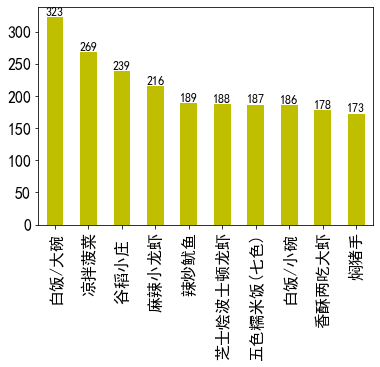

In [4]:
#数据可视化
dishes_counts.plot(kind='bar',color=['y'],fontsize=16)
 
#dishes_counts.plot(kind='line',color=['r'],fontsize=16)
 
for x,y in enumerate(dishes_counts):
#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，
#同时列出数据和数据下标，一般用在 for 循环当中。
    print(x,y)
    plt.text(x,y+2 ,y,ha='center',fontsize=12)
    #第一个x,y相当于坐标位置。+2字体高度调整

Text(0, 0.5, '点菜种类')

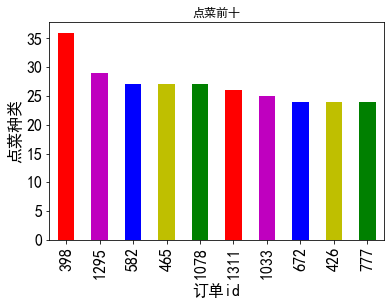

In [5]:

#订单电池的种类最多
data_group=data['order_id'].value_counts()[:10]
data_group.plot(kind='bar',fontsize=16,color=['r','m','b','y','g'])
#data_group.plot(kind='line',fontsize=16,color=['r','m','b','y','g'])
plt.title('点菜前十')
plt.xlabel('订单id',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
 
#8月份点菜订单前十，平均点菜25个菜品

Text(0.5, 1.0, '点菜数量top10')

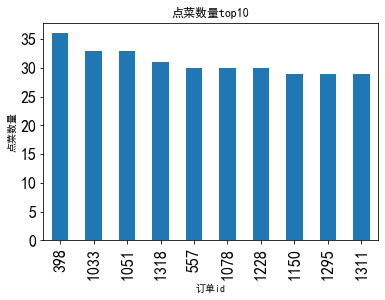

In [6]:
#订单id点菜数量top10(分组order_10,counts求和，取前十)
 
data['total_amounts']=data['counts']*data['amounts']#先添加总价列
dataGroup=data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
#.groupby(by='ord_id')按照order_id分组
Group_sum=dataGroup.sum()#分组求和
sort_counts=Group_sum.sort_values(by='counts',ascending=False)
#Group_sum.sort_values排序，by='counts'以counts来排序，ascending=False降序
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
plt.xlabel('订单id')
plt.ylabel('点菜数量')
plt.title('点菜数量top10')

Text(0.5, 1.0, '消费金额top10')

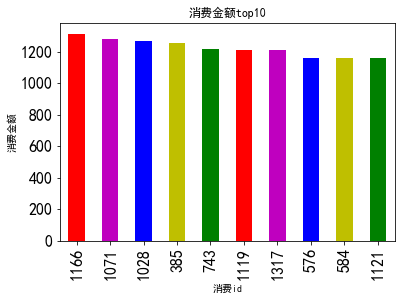

In [7]:
#哪个订单消费金额前十
sort_total_amounts=Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar',fontsize=16,color=['r','m','b','y','g'])
plt.xlabel('消费id')
plt.ylabel('消费金额')
plt.title('消费金额top10')

Text(0.5, 1.0, '消费单价top10')

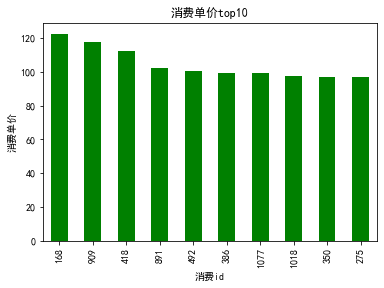

In [8]:
#哪个订单消费单价最高
Group_sum['average']=Group_sum['total_amounts']/Group_sum['counts']
sort_average=Group_sum.sort_values(by='average',ascending=False)
sort_average['average'][:10].plot(kind='bar',color=['g'])
plt.xlabel('消费id')
plt.ylabel('消费单价')
plt.title('消费单价top10')

Text(0.5, 1.0, '各时间段消费人数')

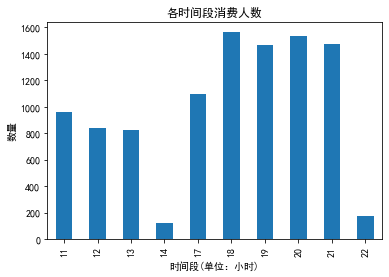

In [9]:
#一天当中什么时间段点菜量比较多（hour)
data['hourcount']=1#新列，用作计数器
data['time']=pd.to_datetime(data['place_order_time'])#将时间转换成日期形式储存
data['hour']=data['time'].map(lambda x:x.hour)
#新建hour列，用map(lambda）以x的形式遍历data['time']所有值，并把其中hour小时进行储存
group_by_hour=data.groupby(by='hour').count()['hourcount']
group_by_hour.plot(kind='bar')
plt.xlabel('时间段(单位：小时)')
plt.ylabel('数量')
plt.title('各时间段消费人数')
#group_by_hour.plot(kind='pie')

Text(0.5, 1.0, '各日期的点菜数量')

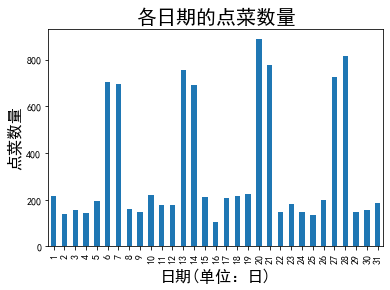

In [10]:
#那一天订餐人数最多
data['daycount']=1#新列，用于存储每天用餐人数 
data['day']=data['place_order_time'].map(lambda x:x.day)
#解析出天，存储到day列中
gp_by_day=data.groupby(by='day').count()['daycount']
#data中‘day’分组，并计算出每组数量，赋值给gp_by_day
 
gp_by_day.plot(kind='bar',fontsize=10)
plt.xlabel('日期(单位：日)',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)
plt.title('各日期的点菜数量',fontsize=20)

Text(0.5, 1.0, '星期与点菜关系')

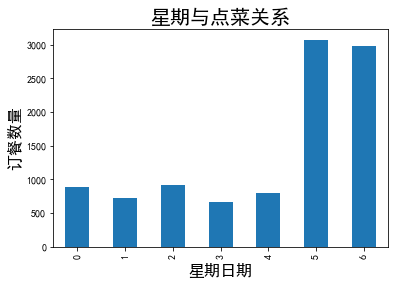

In [11]:
#查看星期几订餐人数最多
data['weekcount']=1#新列，用于存储星期几的用餐人数
data['weekday']=data['time'].map(lambda x:x.weekday())
#新建列，并存储星期几
gp_by_weekday=data.groupby('weekday').count()['weekcount']
#按照不同星期日期进行分组，并把他们数量进行统计，将数量填入’weekday'
 
gp_by_weekday.plot(kind='bar')
plt.xlabel('星期日期',fontsize=16)
plt.ylabel('订餐数量',fontsize=16)
plt.title('星期与点菜关系',fontsize=20)
 